In [230]:
import os
import json
import matplotlib
import mplcyberpunk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mycolorpy.colorlist as cl

from ast import literal_eval
from openai import AzureOpenAI
from dotenv import load_dotenv
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

load_dotenv()

azure_client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    api_version=os.getenv("OPENAI_API_VERSION"),
    azure_endpoint=os.getenv("OPENAI_API_BASE")
)

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
plt.rcParams['savefig.facecolor'] = '#000000'
plt.rcParams['grid.color'] = "#333333"
plt.rcParams['grid.linewidth'] = "2"
plt.rcParams['grid.alpha'] = "0.8"
plt.rcParams['scatter.marker'] = "o"
plt.rcParams['axes3d.xaxis.panecolor'] = "#101010"
plt.rcParams['axes3d.yaxis.panecolor'] = "#101010"
plt.rcParams['axes3d.zaxis.panecolor'] = "#101010"

In [231]:
phrases = [
    "The quick brown fox jumps over the lazy dog.",
    "To be or not to be, that is the question.",
    "In the end, we only regret the chances we didn't take.",
    "Life is what happens when you're busy making other plans.",
    "The greatest glory in living lies not in never falling, but in rising every time we fall.",
    "The way to get started is to quit talking and begin doing.",
    "Your time is limited, don't waste it living someone else's life.",
    "The purpose of our lives is to be happy.",
    "Life is really simple, but we insist on making it complicated.",
    "In three words I can sum up everything I've learned about life: it goes on.",
    "The quick brown fox jumps over the lazy dog.",
    "A stitch in time saves nine.",
    "Actions speak louder than words.",
    "All that glitters is not gold.",
    "Beauty is in the eye of the beholder.",
    "Birds of a feather flock together.",
    "Curiosity killed the cat.",
    "Don't count your chickens before they hatch.",
    "Easy come, easy go.",
    "Every cloud has a silver lining.",
    "Fortune favors the bold.",
    "Haste makes waste.",
    "Ignorance is bliss.",
    "It's raining cats and dogs.",
    "Kill two birds with one stone.",
    "Let sleeping dogs lie.",
    "Make hay while the sun shines.",
    "Necessity is the mother of invention.",
    "Out of sight, out of mind.",
    "Practice makes perfect.",
    "Rome wasn't built in a day.",
    "Slow and steady wins the race.",
    "The early bird catches the worm.",
    "The grass is always greener on the other side.",
    "The pen is mightier than the sword.",
    "There's no place like home.",
    "Time heals all wounds.",
    "Two wrongs don't make a right.",
    "When in Rome, do as the Romans do.",
    "Where there's smoke, there's fire.",
    "You can't judge a book by its cover.",
    "You reap what you sow.",
    "A penny saved is a penny earned.",
    "Better late than never.",
    "Actions speak louder than words.",
    "Don't put all your eggs in one basket.",
    "A watched pot never boils.",
    "Beggars can't be choosers.",
    "Don't bite the hand that feeds you.",
    "Better safe than sorry.",
    "Every dog has its day.",
    "Familiarity breeds contempt.",
    "Half a loaf is better than none.",
    "If it ain't broke, don't fix it.",
    "Misery loves company.",
    "No pain, no gain.",
    "One man's trash is another man's treasure.",
    "The squeaky wheel gets the grease.",
    "There's no time like the present.",
    "You can't teach an old dog new tricks.",
    "The ocean is a vast and mysterious expanse.",
    "Waves crashing against the shore create a symphony of nature.",
    "The ocean's depths hold secrets we may never uncover.",
    "Saltwater runs through my veins like the tides.",
    "The rhythmic sound of waves calms my soul.",
    "Seagulls soar above the endless blue of the ocean.",
    "Sunlight dances on the surface of the water like diamonds.",
    "The ocean's beauty is both captivating and humbling.",
    "Sailors navigate by the stars and the currents of the sea.",
    "The ocean's vastness mirrors the infinity of the cosmos.",
    "Coral reefs are vibrant underwater cities teeming with life.",
    "Whales sing songs that echo across the ocean depths.",
    "Seashells hold the whispers of the ocean's stories.",
    "The ebb and flow of the tide are like the breath of the Earth.",
    "The ocean's waves are nature's heartbeat.",
    "Ships set sail, guided by the winds and the currents.",
    "The ocean's depths are a realm of mystery and wonder.",
    "The ocean is both a source of life and a force of destruction.",
    "The sea breeze carries the scent of adventure.",
    "Sandy beaches stretch as far as the eye can see.",
    "The ocean's waves carve poetry into the coastline.",
    "The ocean's embrace is both gentle and fierce.",
    "Fishermen cast their nets, hoping for a bountiful catch.",
    "The ocean is a vast, uncharted wilderness.",
    "Seaweed sways in the gentle currents like a forest underwater.",
    "The ocean's waves are a constant reminder of nature's power.",
    "The sea sparkles with the reflection of the sun's rays.",
    "The ocean's depths hold ancient relics and lost treasures.",
    "Surfers ride the crest of the waves with skill and grace.",
    "The ocean's tides are governed by the pull of the moon.",
    "Calm seas reflect a clear sky like a mirror.",
    "The ocean's waves carry messages from distant shores.",
    "Ships vanish into the horizon, bound for unknown destinations.",
    "The ocean's depths are a realm of darkness and mystery.",
    "Seagulls glide effortlessly on the ocean breeze.",
    "The ocean's waves are a constant reminder of the passage of time.",
    "The ocean's currents connect distant shores.",
    "Sunsets over the ocean paint the sky in hues of orange and pink.",
    "The ocean's depths are home to creatures beyond imagination.",
    "The ocean's waves are a symphony of sound and motion.",
    "Sailors navigate by the constellations reflected in the water.",
    "The ocean's waves are like fingerprints, each one unique.",
    "The ocean's depths hold the key to understanding our planet's history.",
    "The seafoam dances on the surface of the water like fairy dust.",
    "The ocean's waves carry whispers of distant lands.",
    "The ocean's depths are a silent, serene world.",
    "The ocean's waves are a reminder of the eternal cycle of life.",
    "The sea stretches out to the horizon, a canvas of endless blue.",
    "The ocean's waves are a source of inspiration for poets and dreamers.",
    "Having issues with my Clover Terminal POS, can't seem to process transactions.",
    "My Clover Terminal POS is acting up again, can't login.",
    "The Clover Terminal POS froze during a transaction, what should I do?",
    "Experiencing connectivity issues with my Clover Terminal POS.",
    "Can't print receipts from my Clover Terminal POS, need assistance.",
    "Facing errors while updating my Clover Terminal POS software.",
    "The screen on my Clover Terminal POS is blank, not responding.",
    "Unable to connect my Clover Terminal POS to the internet.",
    "Transactions are not being recorded properly on my Clover Terminal POS.",
    "Getting error messages on my Clover Terminal POS, can't proceed.",
    "My Clover Terminal POS won't turn on, even after charging.",
    "Experiencing slow performance on my Clover Terminal POS.",
    "The touchscreen on my Clover Terminal POS is unresponsive.",
    "My Clover Terminal POS is not reading credit cards.",
    "Having trouble with refunds on my Clover Terminal POS.",
    "Can't process gift card transactions on my Clover Terminal POS.",
    "The Clover Terminal POS is not syncing with my inventory properly.",
    "Transactions are getting stuck midway on my Clover Terminal POS.",
    "Need help setting up my Clover Terminal POS for the first time.",
    "Facing issues with the battery life of my Clover Terminal POS.",
    "The printer on my Clover Terminal POS is jammed.",
    "Getting 'Out of Paper' error on my Clover Terminal POS printer.",
    "The card reader on my Clover Terminal POS is malfunctioning.",
    "Having trouble with the cash drawer on my Clover Terminal POS.",
    "Can't access the settings menu on my Clover Terminal POS.",
    "Need to update the software version on my Clover Terminal POS.",
    "The display screen on my Clover Terminal POS is flickering.",
    "Facing issues with the touch sensitivity on my Clover Terminal POS.",
    "The Clover Terminal POS is not recognizing my login credentials.",
    "Getting 'System Error' message on my Clover Terminal POS.",
    "Experiencing network timeout errors on my Clover Terminal POS.",
    "Need assistance with troubleshooting my Clover Terminal POS connection.",
    "My Clover Terminal POS is not responding to any commands.",
    "Transactions are getting declined on my Clover Terminal POS.",
    "The Clover Terminal POS is displaying incorrect transaction amounts.",
    "Having trouble with inventory management on my Clover Terminal POS.",
    "Can't access reports on my Clover Terminal POS.",
    "The Clover Terminal POS is randomly restarting.",
    "Facing issues with the touchscreen calibration on my Clover Terminal POS.",
    "Need help with software updates on my Clover Terminal POS.",
    "The Clover Terminal POS is displaying error code XYZ.",
    "Experiencing issues with the card chip reader on my Clover Terminal POS.",
    "Can't connect my Clover Terminal POS to the printer.",
    "The receipt printer on my Clover Terminal POS is not working.",
    "Getting 'Insufficient Memory' error on my Clover Terminal POS.",
    "My Clover Terminal POS is displaying a blank screen after startup.",
    "The Clover Terminal POS is not accepting transactions from certain cards.",
    "Experiencing issues with processing NFC payments on my Clover Terminal POS.",
    "Can't access customer support from my Clover Terminal POS."
]



In [251]:
def make_collection_glow(ax, collection, mode="3d"):
    if mode == "3d":
        x, y, z = collection._offsets3d
    elif mode == "2d":
        x, y = collection.get_offsets().data.T
    dot_color = collection.get_facecolor()
    dot_size = collection.get_sizes()
    alpha = 0.2 / 10
    if mode == "3d":
        for _ in range(1, 10):
            ax.scatter(x, y, z, s=dot_size*(1.2**_), c=dot_color, alpha=alpha)
    elif mode == "2d":
        for _ in range(1, 10):
            ax.scatter(x, y, s=dot_size*(1.2**_), c=dot_color, alpha=alpha)

In [232]:
def get_embeddings(phrases: list[str]) -> list[float]:
    return [
        azure_client.embeddings.create(
            input=phrase, model="non-prod-text-embedding-ada-002"
        )
        .data[0]
        .embedding
        for phrase in phrases
    ]

# Reduce into 2 dimensions

In [254]:
def base_plot_2d(embeddings):
    matrix = np.array(embeddings)

    # Create a t-SNE model and transform the data
    tsne = TSNE(
        n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
    )
    vis_dims = tsne.fit_transform(matrix)

    x = [x for x, y in vis_dims]
    y = [y for x, y in vis_dims]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c="C2", alpha=0.9, edgecolor="black")
    ax.set_title("Base Embbeding Visualization")
    
    for collection in ax.collections:
        make_collection_glow(ax, collection, mode="2d")
        
    return fig, ax

# Clustering?

In [234]:
def get_clusters(num_clusters, embeddings):
    matrix = np.vstack(embeddings)

    base_colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

    kmeans = KMeans(n_clusters = num_clusters, init='k-means++', random_state=42)
    kmeans.fit(matrix)
    labels = kmeans.labels_

    colors = [base_colors[i] for i in labels]

    return labels, colors

In [235]:
def get_embeddings_3d(embeddings):
    matrix = np.array(embeddings)
    pca = PCA(n_components=3)
    vis_dims = pca.fit_transform(matrix)
    
    x = [x for x, y, z in vis_dims]
    y = [y for x, y, z in vis_dims]
    z = [z for x, y, z in vis_dims]
    
    return x, y, z

In [255]:
def cluster_plot_2d(embeddings, labels, colors):
    matrix = np.array(embeddings)

    # Create a t-SNE model and transform the data
    tsne = TSNE(
        n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
    )
    vis_dims = tsne.fit_transform(matrix)

    x = [x for x, y in vis_dims]
    y = [y for x, y in vis_dims]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=colors, alpha=1, edgecolor="black")
    ax.set_title("Clustered Embedding Visualization")
    
    for collection in ax.collections:
        make_collection_glow(ax, collection, mode="2d")
        
    return fig, ax

In [237]:
def plotly_3d_scatter(scatter_data):
    fig = go.Figure()
 
    d = pd.DataFrame()
    d["x"] = [x for x,y,z,c,l,o in scatter_data]
    d["y"] = [y for x,y,z,c,l,o in scatter_data]
    d["z"] = [z for x,y,z,c,l,o in scatter_data]
    d["color"] = [c for x,y,z,c,l,o in scatter_data]
    d["label"] = [l for x,y,z,c,l,o in scatter_data]
        
    for idx, label in enumerate(d["label"].unique()):
        sub = d[d["label"]==label].copy()
        fig.add_trace(
            go.Scatter3d(
                x=sub["x"],
                y=sub["y"],
                z=sub["z"],
                mode="markers",
                marker=dict(
                    color=sub["color"],
                    opacity=1,
                    symbol="circle",
                    size=5,
                    line=dict(width=1, color="black"),
                ),
                name=f"LABEL_{label}",
            )
        )

        # add a neon glow effect by plotting the same scatter
        # n time with an increasing diameter scatter point
        size = 5
        for _ in range(5):
            fig.add_trace(
                go.Scatter3d(
                    x=sub["x"],
                    y=sub["y"],
                    z=sub["z"],
                    mode="markers",
                    marker=dict(
                        color=sub["color"],
                        opacity=0.2,
                        symbol="circle",
                        size=size,
                        line=dict(width=1, color="black"),
                    ),
                    showlegend=False,
                ),
            )
            size += 1
     
    # update the layout
    fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, t=0, b=0))
 
    # save the figure to html that can be opened in any web browser
    fig.write_html(
        f"erm.html"
    )
    
    return fig

In [238]:
embeddings = get_embeddings(phrases)
X, Y, Z = get_embeddings_3d(embeddings)

C:\Users\F4BYRF5\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



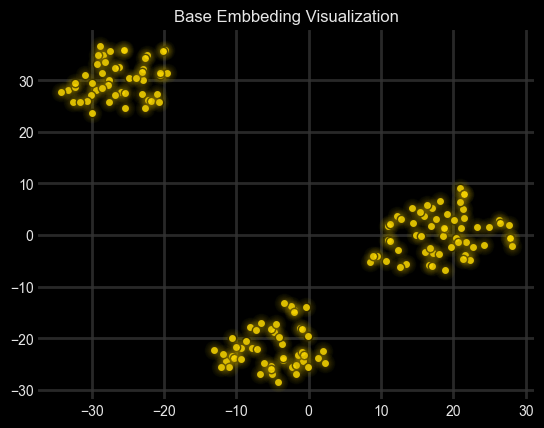

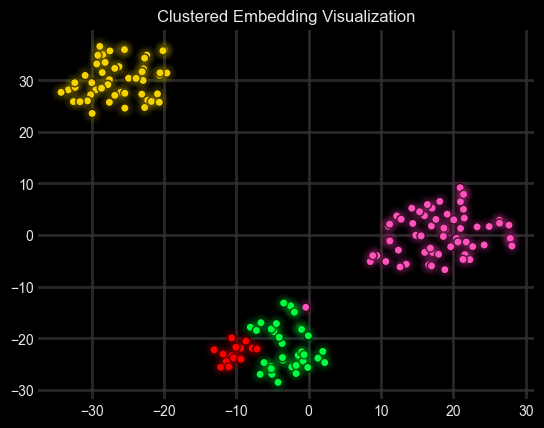

In [256]:
fig1, ax1 = base_plot_2d(embeddings)

labels, colors = get_clusters(num_clusters=4, embeddings=embeddings)

fig2, ax2 = cluster_plot_2d(embeddings=embeddings, labels=labels, colors=colors)

scatter_colors = cl.gen_color(cmap="gist_rainbow", n=len(set(labels)))

scatter_data = [(x, y, z, scatter_colors[label], label, color_og) for x,y,z,label,color_og in zip(X, Y, Z, labels, colors)]

plotly_fig = plotly_3d_scatter(scatter_data=scatter_data)

plotly_fig.show()

In [257]:
d = pd.DataFrame()
d["x"] = [x for x,y,z,c,l,o in scatter_data]
d["y"] = [y for x,y,z,c,l,o in scatter_data]
d["z"] = [z for x,y,z,c,l,o in scatter_data]
d["3d_color"] = [c for x,y,z,c,l,o in scatter_data]
d["label"] = [l for x,y,z,c,l,o in scatter_data]
d["2d_color"] = [o for x,y,z,c,l,o in scatter_data]
d["phrase"] = phrases

d.label.value_counts()


for label in d["label"].unique():
    print(f"LABEL #{label}: {len(d[d['label']==label])} records")
    for phrase in d[d["label"] == label]["phrase"].to_list()[:5]:
        print(f"\t- {phrase}")
    print()

LABEL #0: 61 records
	- The quick brown fox jumps over the lazy dog.
	- To be or not to be, that is the question.
	- In the end, we only regret the chances we didn't take.
	- Life is what happens when you're busy making other plans.
	- The greatest glory in living lies not in never falling, but in rising every time we fall.
LABEL #3: 14 records
	- The ocean is a vast and mysterious expanse.
	- The ocean's depths hold secrets we may never uncover.
	- The ocean's beauty is both captivating and humbling.
	- The ocean's vastness mirrors the infinity of the cosmos.
	- Coral reefs are vibrant underwater cities teeming with life.
LABEL #2: 34 records
	- Waves crashing against the shore create a symphony of nature.
	- Saltwater runs through my veins like the tides.
	- The rhythmic sound of waves calms my soul.
	- Seagulls soar above the endless blue of the ocean.
	- Sunlight dances on the surface of the water like diamonds.
LABEL #1: 49 records
	- Having issues with my Clover Terminal POS, can

In [249]:
erm = d[d["label"] == 1]
print("\n".join(erm["phrase"].to_list()[:15]))

Having issues with my Clover Terminal POS, can't seem to process transactions.
My Clover Terminal POS is acting up again, can't login.
The Clover Terminal POS froze during a transaction, what should I do?
Experiencing connectivity issues with my Clover Terminal POS.
Can't print receipts from my Clover Terminal POS, need assistance.
Facing errors while updating my Clover Terminal POS software.
The screen on my Clover Terminal POS is blank, not responding.
Unable to connect my Clover Terminal POS to the internet.
Transactions are not being recorded properly on my Clover Terminal POS.
Getting error messages on my Clover Terminal POS, can't proceed.
My Clover Terminal POS won't turn on, even after charging.
Experiencing slow performance on my Clover Terminal POS.
The touchscreen on my Clover Terminal POS is unresponsive.
My Clover Terminal POS is not reading credit cards.
Having trouble with refunds on my Clover Terminal POS.
